1. Perform data cleaning and exploratory data analysis
2. Explore relationship between the variables and identify patterns and trends in the data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")  
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.isnull().sum()

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

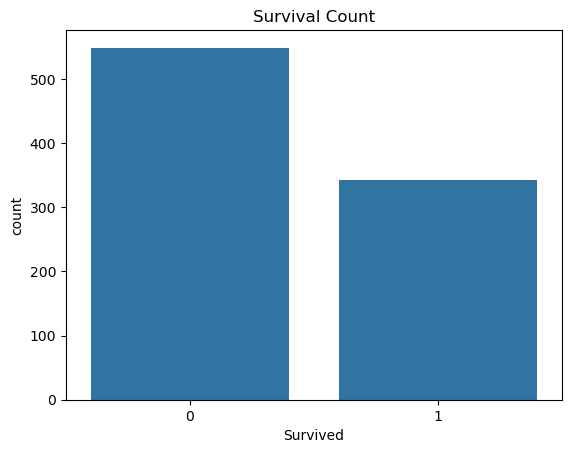

In [3]:
#survival count
sns.countplot(data=df, x='Survived')
plt.title("Survival Count")
plt.show()


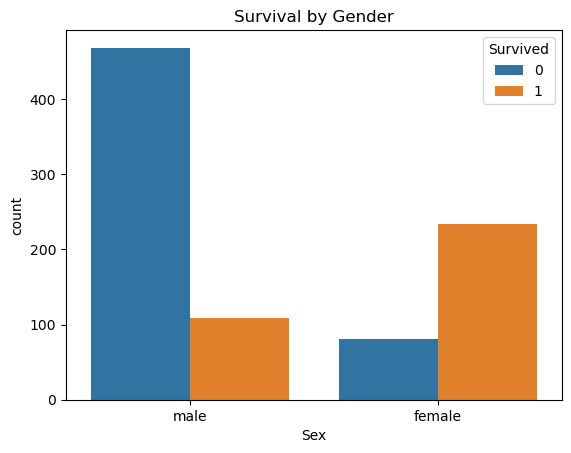

In [4]:
#survival by gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()


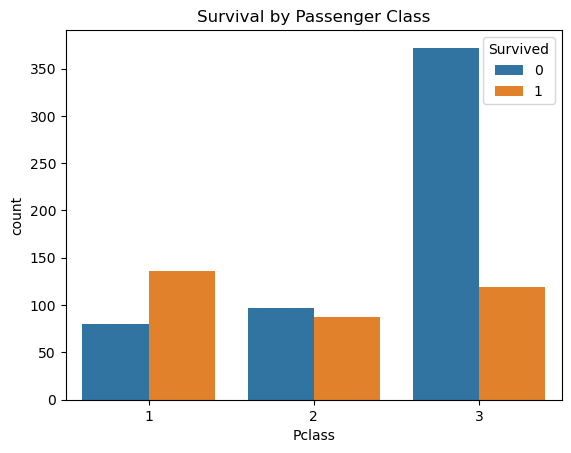

In [5]:
#survival by passenger class
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()

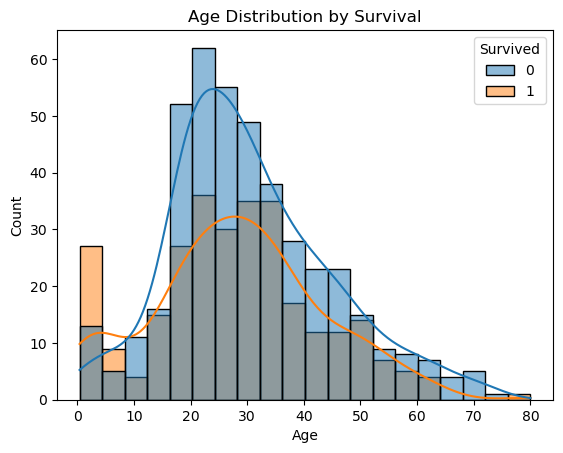

In [9]:
#age distribution by survival
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title("Age Distribution by Survival")
plt.show()


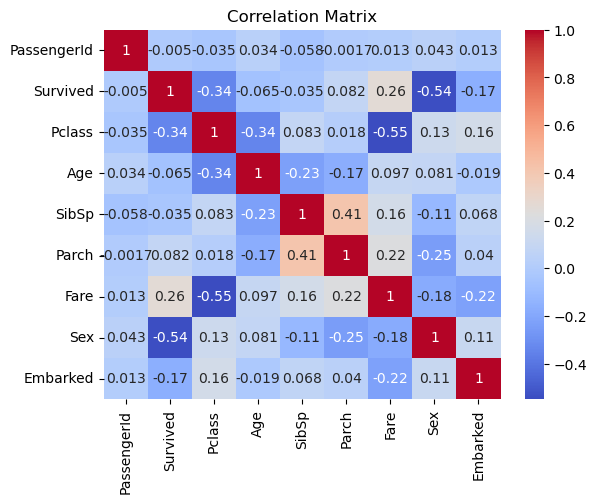

In [10]:
# Create a copy to avoid modifying original
df_corr = df.copy()

# Drop irrelevant or non-numeric columns 
df_corr.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked', 'Sex'], errors='ignore', inplace=True)

# Convert categorical columns to category dtype and then to numeric
if 'Sex' in df.columns:
    df_corr['Sex'] = df['Sex'].astype('category').cat.codes

if 'Embarked' in df.columns:
    df_corr['Embarked'] = df['Embarked'].astype('category').cat.codes

# Plot the correlation heatmap
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
